# ESP32_ADC_Measurements_Dataset 
### Name: Jorge García

The dataset provides direct measurements from the ESP32's analog-to-digital converter (ADC) to verify its internal resolution. The measurements were conducted using a single ESP32 and a DPS3010U power supply, which offers voltage and load stability of less than 0.1%. The data includes information about the pin used on the ESP32, the measured voltage (calculated using the ESP32's map() function), resolution, the actual voltage supplied by the source, current, and watts consumed. This dataset is valuable for analysis, modeling, and development of applications requiring voltage measurements using ESP32 devices. Dataset Characteristics: Data Type: Direct measurements from the ESP32's ADC. Data Source: Measurements from a single ESP32 using a DPS3010U power supply. Included Variables: Pin used, measured voltage, resolution, actual voltage, current, and watts.

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

In [4]:
df = pd.read_csv("sensores.csv")
df.head()

,Pin,Voltaje_Medido,Resolution,Voltaje_Real,Current,Watts
0,33,0.0,0,0.0,0.0,0.0
1,33,0.0,0,0.0,0.0,0.0
2,33,0.0,0,0.0,0.0,0.0
3,33,0.0,0,0.0,0.0,0.0
4,33,0.0,0,0.0,0.0,0.0


In [5]:
df = df.drop(columns=['Pin'])
df.head()

,Voltaje_Medido,Resolution,Voltaje_Real,Current,Watts
0,0.0,0,0.0,0.0,0.0
1,0.0,0,0.0,0.0,0.0
2,0.0,0,0.0,0.0,0.0
3,0.0,0,0.0,0.0,0.0
4,0.0,0,0.0,0.0,0.0


In [59]:
# Verificar si hay valores nulos en cada columna
valores_nulos = df.isnull().any()

# Mostrar las columnas con valores nulos
print("Columnas con valores nulos:")
print(valores_nulos[valores_nulos == True])

Columnas con valores nulos:
Series([], dtype: bool)


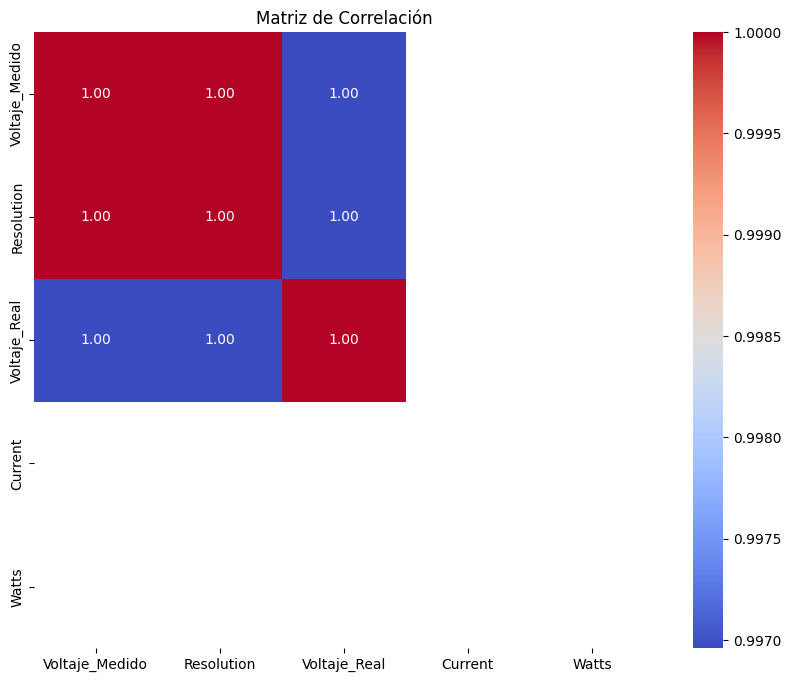

In [8]:
corr = df.corr()
# Visualizar la matriz de correlación como un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

## Regresión Lineal

In [42]:
X = df['Resolution'].values.reshape(-1, 1)
y = df['Voltaje_Real'].values

In [43]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Coeficientes del modelo
print('Coeficiente:', model.coef_)
print('Intercepto:', model.intercept_)

Coeficiente: [0.00077788]
Intercepto: 0.17905545604536122


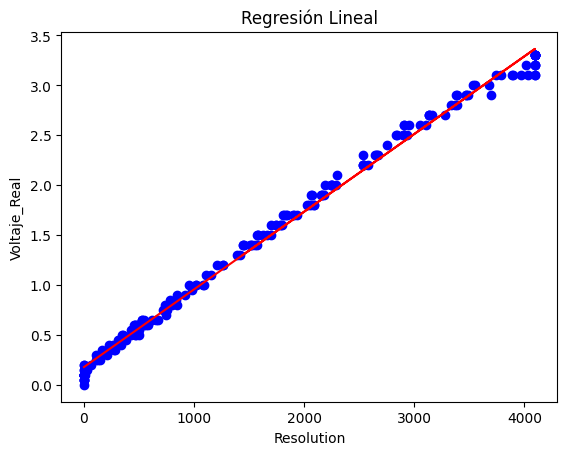

In [45]:
# Graficar la regresión lineal
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red')
plt.xlabel('Resolution')
plt.ylabel('Voltaje_Real')
plt.title('Regresión Lineal')
plt.show()

In [46]:
# Calcular el coeficiente de determinación (R-cuadrado)
r2 = r2_score(y_test, y_pred)
print('Coeficiente de Determinación (R^2):', r2)

Coeficiente de Determinación (R^2): 0.9948845576115359


## Polynomial

In [54]:
# Grado del polinomio
grado_polinomio = 4

# Transformar los datos originales a características polinomiales
poly_features = PolynomialFeatures(degree=grado_polinomio)
X_poly = poly_features.fit_transform(X)

# Crear y entrenar el modelo de regresión lineal con las características polinomiales
model = LinearRegression()
model.fit(X_poly, y)

# Predecir valores usando el modelo entrenado
y_pred = model.predict(X_poly)

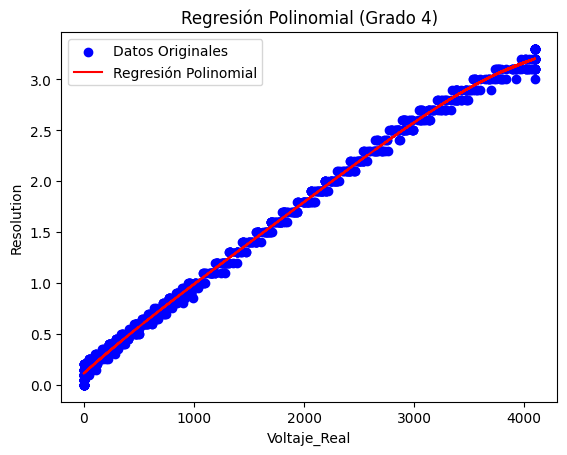

In [55]:
# Graficar los datos originales y la regresión polinomial
plt.scatter(X, y, color='blue', label='Datos Originales')
plt.plot(X, y_pred, color='red', label='Regresión Polinomial')
plt.xlabel('Voltaje_Real')
plt.ylabel('Resolution')
plt.title('Regresión Polinomial (Grado ' + str(grado_polinomio) + ')')
plt.legend()
plt.show()

In [56]:


# Calcular el coeficiente de determinación (R-cuadrado)
r2 = r2_score(y, y_pred)
print('Coeficiente de Determinación (R^2):', r2)

Coeficiente de Determinación (R^2): 0.9977317998288464


In [57]:
coeficientes = model.coef_
print(coeficientes)

[ 0.00000000e+00  9.75539699e-04 -1.51696922e-07  5.97345027e-11
 -8.76295564e-15]
